In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey = "zCx0JaM9CiSgcpCZNNXa8ikLU"
consumerSecret = "83bFGYWq2WSyIqaKuUUoLuhxxwDZrlyrGefhVUhlSQUdmV6j4n"
accessToken = "2866887739-phJN9WUSO09XFVgOl8Xi7AF4IAxo6H1Duiwuad9"
accessTokenSecret = "GacIaF05S54y48jWebeJ7wqWA4luoUB4hDfpnqbL9cJgs"

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [59]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ElonMusk", count = 100, lang ="en",
                          tweet_mode="extended")

print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @PPathole https://t.co/v7cffwac0A

2) Bought a hand knit wool Marvin the Martian helm for my dog

3) https://t.co/gpcvjIBTLM

4) I kinda love Etsy

5) @thesheetztweetz It does not serve the public to hamstring Starlink today for an Amazon satellite system that is at best several years away from operation



In [60]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@PPathole https://t.co/v7cffwac0A
1,Bought a hand knit wool Marvin the Martian hel...
2,https://t.co/gpcvjIBTLM
3,I kinda love Etsy
4,@thesheetztweetz It does not serve the public ...


In [61]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,
1,Bought a hand knit wool Marvin the Martian hel...
2,
3,I kinda love Etsy
4,It does not serve the public to hamstring Sta...
...,...
95,Mus protec 👶 yoda
96,Он был великолепен
97,This is an important distinction
98,Much more than this &amp; increasing rapidly


In [62]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,,0.000000,0.000000
1,Bought a hand knit wool Marvin the Martian hel...,0.000000,0.000000
2,,0.000000,0.000000
3,I kinda love Etsy,0.600000,0.500000
4,It does not serve the public to hamstring Sta...,0.122222,0.333333
...,...,...,...
95,Mus protec 👶 yoda,0.000000,0.000000
96,Он был великолепен,0.000000,0.000000
97,This is an important distinction,1.000000,0.400000
98,Much more than this &amp; increasing rapidly,0.500000,0.500000


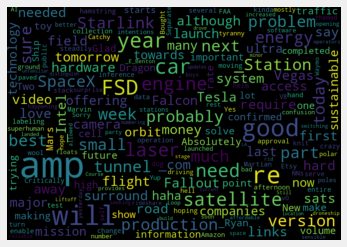

In [63]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [64]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,,0.000000,0.000000,Neutral
1,Bought a hand knit wool Marvin the Martian hel...,0.000000,0.000000,Neutral
2,,0.000000,0.000000,Neutral
3,I kinda love Etsy,0.600000,0.500000,Positive
4,It does not serve the public to hamstring Sta...,0.122222,0.333333,Positive
...,...,...,...,...
95,Mus protec 👶 yoda,0.000000,0.000000,Neutral
96,Он был великолепен,0.000000,0.000000,Neutral
97,This is an important distinction,1.000000,0.400000,Positive
98,Much more than this &amp; increasing rapidly,0.500000,0.500000,Positive


In [65]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) I kinda love Etsy

2)  It does not serve the public to hamstring Starlink today for an Amazon satellite system that is at best several years away from operation

3)  Tesla is steadily moving all NNs to 8 camera surround video. This will enable superhuman self-driving.

4)  To my surprise, Tesla has better AI hardware &amp; software than Waymo (money)

5) : Falcon 9’s first stage has landed on the Of Course I Still Love You droneship 

6)  We’re switching to a more sensible FSD version numbering to distinguish between major &amp; minor updates. Current build is FSD 8.1. It drove me to an unfamiliar location in LA &amp; back last night with no interventions!

7)  Hopefully, early next week

8)   Given so many other companies are depending on this mission, it is getting even more scrutiny than a Starlink flight

9) Launching many small satellites for a wide range of customers tomorrow. Excited about offering low-cost access to orbit for small companies! 

10)

In [66]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  The entire “stack” from data collection through labeling &amp; inference has to be in surround video. This is a hard problem. Critically, however, this does not require a hardware change to cars in field.

2)   Yes, although it will be crazy not to turn  on FSD

3)  [Some tyranny]. Also, the road to hell is mostly paved with bad intentions.

4)  _Intel   All sats launched next year will have laser links. Only our polar sats have lasers this year &amp; are v0.9.

5)   Sorry for the version confusion. V8.1 is what it should say for FSD. Separate version number for rest of car.

6) : SpaceX’s rideshare offering provides increased access to space for small satellite operators seeking a reliable, affordable rid…

7) : Due to unfavorable weather, we are standing down from today's launch; the team will continue with the countdown until T-30 seco…

8)    Two of the engines need slight repairs, so will be switched out

9) Today at SpaceX is about practicing Starsh

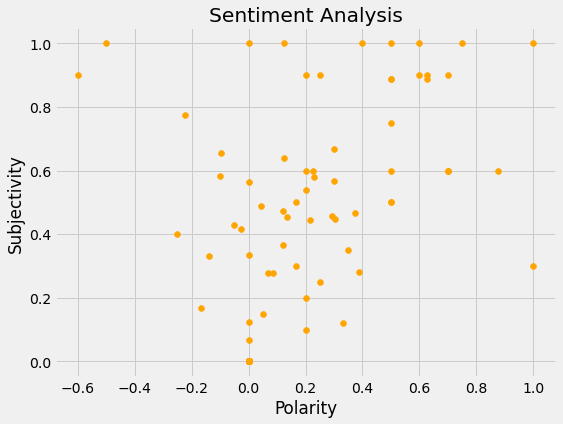

In [67]:
# Plotting 
plt.figure(figsize=(8,6)) 
plt.scatter(df["Polarity"],df["Subjectivity"],color="orange")
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [68]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

49.0

In [69]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.0

In [70]:
# Show the value counts
df['Analysis'].value_counts()

Positive    49
Neutral     41
Negative    10
Name: Analysis, dtype: int64

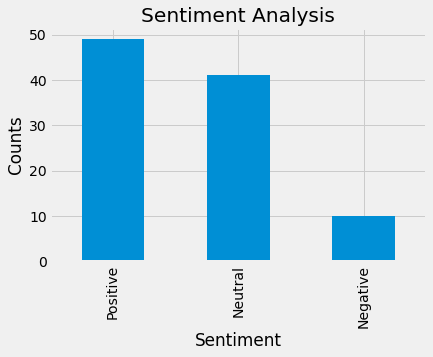

In [71]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()